In [10]:
import torch
import time
from datasets import load_dataset
from transformers import AutoTokenizer
from gptqmodel import GPTQModel, QuantizeConfig
from gptqmodel.utils import Perplexity
import matplotlib.pyplot as plt
import numpy as np
import gc
import utils, visualize_utils
import importlib
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
import utils_QA
import os

In [ ]:
from huggingface_hub import login
login()

In [3]:
# Load SQuAD dataset
def load_squad_data():
    print("Loading SQuAD dataset...")
    squad = load_dataset("squad")
    return squad

In [4]:
dataset = utils_QA.load_squad_data()
print(dataset[0])

Loading SQuAD dataset...
{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}


In [ ]:
importlib.reload(utils)
model_id = "meta-llama/Llama-3.2-1B-Instruct"
squad_dataset = utils_QA.load_squad_data()
tokenizer = AutoTokenizer.from_pretrained(model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
preprocessed_dataset = utils_QA.preprocess_squad_for_quantization(squad_dataset, tokenizer)
#print(preprocessed_dataset[0])

Loading SQuAD dataset...


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

c:\Users\galfanol\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\galfanol\.cache\huggingface\hub\datasets--squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [5]:
print(len(preprocessed_dataset))
used_dataset = preprocessed_dataset[:500]

87599


In [6]:
utils.quantize_for_all_bits_precision("SQuAD_models",used_dataset, model_id, "SQuAD")

INFO - Auto pick kernel based on compatibility: <class 'gptqmodel.nn_modules.qlinear.dynamic_cuda.DynamicCudaQuantLinear'>
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 2 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '5.56343', 'damp': '0.01000', 'time': '1.335'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.14392', 'damp': '0.01000', 'time': '0.864'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '11.66676', 'damp': '0.01000', 'time': '0.908'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.01557', 'damp': '0.01000', 'time': '0.805'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '10.49259', 'damp': '0.01000', 'time': '0.949'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '13.25018', 'damp': '0.01000', 'time': '0.923'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.08480', 'damp': '0.01000', 'time': '4.368'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:03:07 / 0:24:56 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '11.48079', 'damp': '0.01000', 'time': '1.313'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.64036', 'damp': '0.01000', 'time': '1.348'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '21.62207', 'damp': '0.01000', 'time': '1.355'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.03625', 'damp': '0.01000', 'time': '0.822'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '17.52326', 'damp': '0.01000', 'time': '0.921'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '24.08031', 'damp': '0.01000', 'time': '1.048'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '153.29413', 'damp': '0.01000', 'time': '4.138'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:06:15 / 0:33:20 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '16.63268', 'damp': '0.01000', 'time': '0.930'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '1.18662', 'damp': '0.01000', 'time': '0.920'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '33.29968', 'damp': '0.01000', 'time': '1.171'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.03752', 'damp': '0.01000', 'time': '0.966'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '19.42162', 'damp': '0.01000', 'time': '0.921'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '31.16689', 'damp': '0.01000', 'time': '0.984'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.21522', 'damp': '0.01000', 'time': '4.169'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:09:15 / 0:37:00 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '13.97844', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '1.82527', 'damp': '0.01000', 'time': '0.998'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '30.67407', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.06532', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '26.17309', 'damp': '0.01000', 'time': '0.959'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '52.07448', 'damp': '0.01000', 'time': '1.073'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.33294', 'damp': '0.01000', 'time': '4.649'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:12:14 / 0:39:08 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '16.69926', 'damp': '0.01000', 'time': '1.042'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '1.96815', 'damp': '0.01000', 'time': '1.000'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '34.86136', 'damp': '0.01000', 'time': '1.046'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.11322', 'damp': '0.01000', 'time': '0.864'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '29.60918', 'damp': '0.01000', 'time': '0.892'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '63.69839', 'damp': '0.01000', 'time': '0.904'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.41660', 'damp': '0.01000', 'time': '4.008'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:15:21 / 0:40:56 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '25.22151', 'damp': '0.01000', 'time': '0.989'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '1.81841', 'damp': '0.01000', 'time': '1.015'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '45.96384', 'damp': '0.01000', 'time': '1.036'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.12916', 'damp': '0.01000', 'time': '0.927'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '32.71553', 'damp': '0.01000', 'time': '0.875'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '60.22275', 'damp': '0.01000', 'time': '0.915'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.48469', 'damp': '0.01000', 'time': '3.991'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:18:18 / 0:41:49 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '23.71175', 'damp': '0.01000', 'time': '1.034'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '2.49897', 'damp': '0.01000', 'time': '0.967'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '37.24316', 'damp': '0.01000', 'time': '1.179'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.20552', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '33.74998', 'damp': '0.01000', 'time': '0.972'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '60.73391', 'damp': '0.01000', 'time': '0.942'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.53041', 'damp': '0.01000', 'time': '4.086'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:21:14 / 0:42:28 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '24.84320', 'damp': '0.01000', 'time': '0.872'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '3.00641', 'damp': '0.01000', 'time': '0.855'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '46.36061', 'damp': '0.01000', 'time': '0.930'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.21829', 'damp': '0.01000', 'time': '0.959'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '36.89478', 'damp': '0.01000', 'time': '0.940'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '59.60882', 'damp': '0.01000', 'time': '1.033'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.61877', 'damp': '0.01000', 'time': '3.956'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:24:04 / 0:42:47 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '29.91346', 'damp': '0.01000', 'time': '0.805'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '3.02093', 'damp': '0.01000', 'time': '0.955'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '49.07095', 'damp': '0.01000', 'time': '1.106'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.26361', 'damp': '0.01000', 'time': '0.806'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '41.59424', 'damp': '0.01000', 'time': '0.965'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '65.16736', 'damp': '0.01000', 'time': '1.032'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.78892', 'damp': '0.01000', 'time': '3.554'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:27:06 / 0:43:21 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '24.67468', 'damp': '0.01000', 'time': '0.955'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '3.58946', 'damp': '0.01000', 'time': '0.902'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '59.62485', 'damp': '0.01000', 'time': '1.014'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.44853', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '46.09818', 'damp': '0.01000', 'time': '0.890'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '74.81784', 'damp': '0.01000', 'time': '1.059'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.96042', 'damp': '0.01000', 'time': '3.939'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:30:16 / 0:44:01 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '29.49023', 'damp': '0.01000', 'time': '0.992'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '3.62825', 'damp': '0.01000', 'time': '1.102'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '61.42006', 'damp': '0.01000', 'time': '1.064'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.38995', 'damp': '0.01000', 'time': '0.794'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '56.66953', 'damp': '0.01000', 'time': '0.851'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '89.02526', 'damp': '0.01000', 'time': '0.895'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '1.34765', 'damp': '0.01000', 'time': '3.966'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:33:28 / 0:44:37 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '36.00480', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '3.87648', 'damp': '0.01000', 'time': '1.100'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '61.76474', 'damp': '0.01000', 'time': '1.100'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.28388', 'damp': '0.01000', 'time': '0.968'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '67.11605', 'damp': '0.01000', 'time': '1.050'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '102.99495', 'damp': '0.01000', 'time': '1.167'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '1.74378', 'damp': '0.01000', 'time': '5.469'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:36:26 / 0:44:50 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '35.28570', 'damp': '0.01000', 'time': '1.164'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '4.07706', 'damp': '0.01000', 'time': '1.228'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '63.98922', 'damp': '0.01000', 'time': '1.299'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.30403', 'damp': '0.01000', 'time': '1.119'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '74.93631', 'damp': '0.01000', 'time': '0.988'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '108.83497', 'damp': '0.01000', 'time': '1.076'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '2.32780', 'damp': '0.01000', 'time': '4.334'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:39:25 / 0:45:02 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '35.91396', 'damp': '0.01000', 'time': '0.948'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '6.67391', 'damp': '0.01000', 'time': '1.033'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '71.81364', 'damp': '0.01000', 'time': '1.115'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.50011', 'damp': '0.01000', 'time': '0.874'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '88.78588', 'damp': '0.01000', 'time': '0.907'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '117.84733', 'damp': '0.01000', 'time': '0.928'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '3.45801', 'damp': '0.01000', 'time': '4.382'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:42:23 / 0:45:12 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '34.08298', 'damp': '0.01000', 'time': '0.845'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '13.02924', 'damp': '0.01000', 'time': '0.949'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '70.02423', 'damp': '0.01000', 'time': '1.018'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '1.26981', 'damp': '0.01000', 'time': '0.890'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '99.59666', 'damp': '0.01000', 'time': '0.933'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '143.10878', 'damp': '0.01000', 'time': '0.889'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '4.33703', 'damp': '0.01000', 'time': '4.226'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:45:27 / 0:45:27 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '32.11711', 'damp': '0.01000', 'time': '0.792'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '14.07846', 'damp': '0.01000', 'time': '0.808'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '65.62634', 'damp': '0.01000', 'time': '0.936'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '3.40117', 'damp': '0.01000', 'time': '0.942'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '125.56319', 'damp': '0.01000', 'time': '0.868'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '166.57038', 'damp': '0.01000', 'time': '0.939'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '10.06722', 'damp': '0.01000', 'time': '3.678'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '5.56343', 'damp': '0.01000', 'time': '1.335'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.14392', 'damp': '0.01000', 'time': '0.864'}, {'layer': 0, 'module': 'self_attn

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%7 / 2:05:04 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1251.74MB, 1.22GB
INFO - Size difference: 3462.58MB, 3.38GB - 73.45%
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 3 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.71566', 'damp': '0.01000', 'time': '1.267'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.02125', 'damp': '0.01000', 'time': '1.370'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '1.51067', 'damp': '0.01000', 'time': '1.391'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00237', 'damp': '0.01000', 'time': '1.101'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '1.56522', 'damp': '0.01000', 'time': '1.053'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '1.95740', 'damp': '0.01000', 'time': '1.096'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00927', 'damp': '0.01000', 'time': '5.403'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:03:27 / 0:27:36 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '1.46730', 'damp': '0.01000', 'time': '1.140'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.08739', 'damp': '0.01000', 'time': '0.895'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '2.92839', 'damp': '0.01000', 'time': '1.056'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00502', 'damp': '0.01000', 'time': '1.009'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '2.48426', 'damp': '0.01000', 'time': '1.011'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '3.39654', 'damp': '0.01000', 'time': '1.099'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '29.27916', 'damp': '0.01000', 'time': '4.230'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:06:39 / 0:35:28 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '2.73800', 'damp': '0.01000', 'time': '0.893'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.19887', 'damp': '0.01000', 'time': '0.934'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '5.36225', 'damp': '0.01000', 'time': '1.019'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00588', 'damp': '0.01000', 'time': '0.963'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '3.08433', 'damp': '0.01000', 'time': '0.972'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '4.88547', 'damp': '0.01000', 'time': '1.035'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.02572', 'damp': '0.01000', 'time': '3.997'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:09:43 / 0:38:52 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '2.00573', 'damp': '0.01000', 'time': '0.853'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.27586', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '4.42396', 'damp': '0.01000', 'time': '1.061'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.01017', 'damp': '0.01000', 'time': '0.858'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '3.89317', 'damp': '0.01000', 'time': '0.865'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '7.69693', 'damp': '0.01000', 'time': '0.946'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.03988', 'damp': '0.01000', 'time': '3.822'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:12:48 / 0:40:57 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '2.15002', 'damp': '0.01000', 'time': '0.967'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.26188', 'damp': '0.01000', 'time': '1.229'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '4.46985', 'damp': '0.01000', 'time': '1.412'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.01939', 'damp': '0.01000', 'time': '1.114'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '3.96191', 'damp': '0.01000', 'time': '1.162'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '8.47804', 'damp': '0.01000', 'time': '1.360'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.05029', 'damp': '0.01000', 'time': '3.732'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:15:47 / 0:42:05 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '3.19670', 'damp': '0.01000', 'time': '0.952'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.23093', 'damp': '0.01000', 'time': '1.028'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '5.71360', 'damp': '0.01000', 'time': '1.061'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.02262', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '4.24175', 'damp': '0.01000', 'time': '0.878'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '7.75326', 'damp': '0.01000', 'time': '1.110'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.06108', 'damp': '0.01000', 'time': '3.792'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:18:46 / 0:42:53 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '2.69975', 'damp': '0.01000', 'time': '1.040'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.30200', 'damp': '0.01000', 'time': '0.849'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '4.31446', 'damp': '0.01000', 'time': '1.217'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.03525', 'damp': '0.01000', 'time': '0.921'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '4.29479', 'damp': '0.01000', 'time': '0.906'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '7.66166', 'damp': '0.01000', 'time': '1.021'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.06514', 'damp': '0.01000', 'time': '5.019'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:21:46 / 0:43:32 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '2.67373', 'damp': '0.01000', 'time': '0.895'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.34284', 'damp': '0.01000', 'time': '0.974'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '5.05263', 'damp': '0.01000', 'time': '1.120'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.03451', 'damp': '0.01000', 'time': '0.823'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '4.40471', 'damp': '0.01000', 'time': '0.854'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '7.07976', 'damp': '0.01000', 'time': '0.881'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.07248', 'damp': '0.01000', 'time': '3.799'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:24:58 / 0:44:23 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '3.12872', 'damp': '0.01000', 'time': '0.821'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.32564', 'damp': '0.01000', 'time': '0.878'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '5.20207', 'damp': '0.01000', 'time': '1.028'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.04509', 'damp': '0.01000', 'time': '0.855'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '4.82335', 'damp': '0.01000', 'time': '0.914'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '7.52982', 'damp': '0.01000', 'time': '0.874'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.09486', 'damp': '0.01000', 'time': '3.753'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:27:54 / 0:44:38 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '2.49449', 'damp': '0.01000', 'time': '0.836'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.38145', 'damp': '0.01000', 'time': '0.903'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '6.12381', 'damp': '0.01000', 'time': '1.069'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.06198', 'damp': '0.01000', 'time': '1.075'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '4.99544', 'damp': '0.01000', 'time': '1.102'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '8.08283', 'damp': '0.01000', 'time': '1.227'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.11023', 'damp': '0.01000', 'time': '3.865'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:30:49 / 0:44:49 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '2.85796', 'damp': '0.01000', 'time': '1.165'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.38738', 'damp': '0.01000', 'time': '1.008'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '6.01930', 'damp': '0.01000', 'time': '1.134'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.04108', 'damp': '0.01000', 'time': '0.993'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '5.78859', 'damp': '0.01000', 'time': '0.995'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '9.02770', 'damp': '0.01000', 'time': '1.010'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.13510', 'damp': '0.01000', 'time': '4.047'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:33:52 / 0:45:09 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '3.39095', 'damp': '0.01000', 'time': '1.177'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.40026', 'damp': '0.01000', 'time': '1.393'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '5.94783', 'damp': '0.01000', 'time': '1.347'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.03255', 'damp': '0.01000', 'time': '1.133'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '6.53779', 'damp': '0.01000', 'time': '0.996'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '10.00984', 'damp': '0.01000', 'time': '1.040'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.15267', 'damp': '0.01000', 'time': '5.408'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:36:58 / 0:45:29 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '3.34969', 'damp': '0.01000', 'time': '0.842'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.41149', 'damp': '0.01000', 'time': '0.907'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '5.92100', 'damp': '0.01000', 'time': '1.089'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.03060', 'damp': '0.01000', 'time': '0.864'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '6.90508', 'damp': '0.01000', 'time': '0.880'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '10.02917', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.17705', 'damp': '0.01000', 'time': '3.844'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:39:54 / 0:45:36 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '3.32598', 'damp': '0.01000', 'time': '0.903'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.67271', 'damp': '0.01000', 'time': '0.934'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '6.74448', 'damp': '0.01000', 'time': '1.113'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.03621', 'damp': '0.01000', 'time': '0.925'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '8.16002', 'damp': '0.01000', 'time': '1.008'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '10.83677', 'damp': '0.01000', 'time': '1.129'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.25521', 'damp': '0.01000', 'time': '4.217'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:42:58 / 0:45:49 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '3.60856', 'damp': '0.01000', 'time': '0.862'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '1.39612', 'damp': '0.01000', 'time': '0.930'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '6.96410', 'damp': '0.01000', 'time': '1.038'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.09244', 'damp': '0.01000', 'time': '0.846'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '9.33870', 'damp': '0.01000', 'time': '0.991'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '13.39192', 'damp': '0.01000', 'time': '1.049'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.34054', 'damp': '0.01000', 'time': '3.774'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:45:55 / 0:45:55 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '3.42521', 'damp': '0.01000', 'time': '1.008'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '1.45071', 'damp': '0.01000', 'time': '1.087'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '6.46436', 'damp': '0.01000', 'time': '1.020'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.50613', 'damp': '0.01000', 'time': '1.045'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '11.71253', 'damp': '0.01000', 'time': '0.995'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '15.47111', 'damp': '0.01000', 'time': '1.046'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.94651', 'damp': '0.01000', 'time': '3.889'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.71566', 'damp': '0.01000', 'time': '1.267'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.02125', 'damp': '0.01000', 'time': '1.370'}, {'layer': 0, 'module': 'self_attn.q_pro

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%4 / 2:18:08 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1368.65MB, 1.34GB
INFO - Size difference: 3345.67MB, 3.27GB - 70.97%
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 4 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.14486', 'damp': '0.01000', 'time': '1.075'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00446', 'damp': '0.01000', 'time': '0.971'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '0.30719', 'damp': '0.01000', 'time': '1.022'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00049', 'damp': '0.01000', 'time': '1.011'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '0.32752', 'damp': '0.01000', 'time': '0.932'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '0.40887', 'damp': '0.01000', 'time': '1.071'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00189', 'damp': '0.01000', 'time': '5.418'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:03:04 / 0:24:32 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '0.29654', 'damp': '0.01000', 'time': '0.890'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.01789', 'damp': '0.01000', 'time': '0.943'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '0.59294', 'damp': '0.01000', 'time': '1.076'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00107', 'damp': '0.01000', 'time': '1.011'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '0.51976', 'damp': '0.01000', 'time': '0.888'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '0.70983', 'damp': '0.01000', 'time': '1.002'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '4.01897', 'damp': '0.01000', 'time': '4.013'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:06:07 / 0:32:37 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '0.61177', 'damp': '0.01000', 'time': '0.997'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.04501', 'damp': '0.01000', 'time': '1.055'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '1.19161', 'damp': '0.01000', 'time': '1.203'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00115', 'damp': '0.01000', 'time': '0.955'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '0.69700', 'damp': '0.01000', 'time': '0.871'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '1.09958', 'damp': '0.01000', 'time': '1.134'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.00563', 'damp': '0.01000', 'time': '4.583'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:09:07 / 0:36:28 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '0.42607', 'damp': '0.01000', 'time': '1.050'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.05978', 'damp': '0.01000', 'time': '0.983'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '0.94035', 'damp': '0.01000', 'time': '0.935'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.00252', 'damp': '0.01000', 'time': '0.998'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '0.83639', 'damp': '0.01000', 'time': '1.016'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '1.64731', 'damp': '0.01000', 'time': '1.018'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.00880', 'damp': '0.01000', 'time': '4.310'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:12:04 / 0:38:36 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '0.43397', 'damp': '0.01000', 'time': '0.856'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.05424', 'damp': '0.01000', 'time': '1.044'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '0.90581', 'damp': '0.01000', 'time': '1.065'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.00451', 'damp': '0.01000', 'time': '0.970'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '0.82343', 'damp': '0.01000', 'time': '0.952'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '1.75802', 'damp': '0.01000', 'time': '1.044'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.01044', 'damp': '0.01000', 'time': '4.030'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:14:59 / 0:39:57 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '0.64054', 'damp': '0.01000', 'time': '0.845'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.04575', 'damp': '0.01000', 'time': '1.006'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '1.12892', 'damp': '0.01000', 'time': '1.094'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.00478', 'damp': '0.01000', 'time': '0.868'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '0.85333', 'damp': '0.01000', 'time': '0.874'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '1.55557', 'damp': '0.01000', 'time': '1.056'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.01214', 'damp': '0.01000', 'time': '4.019'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:17:52 / 0:40:50 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '0.51701', 'damp': '0.01000', 'time': '1.003'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.05880', 'damp': '0.01000', 'time': '1.089'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '0.83470', 'damp': '0.01000', 'time': '1.382'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.00719', 'damp': '0.01000', 'time': '1.148'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '0.85252', 'damp': '0.01000', 'time': '1.004'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '1.51811', 'damp': '0.01000', 'time': '0.916'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.01263', 'damp': '0.01000', 'time': '4.234'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:20:48 / 0:41:36 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '0.50733', 'damp': '0.01000', 'time': '0.975'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.06609', 'damp': '0.01000', 'time': '0.913'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '0.97175', 'damp': '0.01000', 'time': '0.970'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.00683', 'damp': '0.01000', 'time': '0.848'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '0.86665', 'damp': '0.01000', 'time': '0.887'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '1.39189', 'damp': '0.01000', 'time': '0.927'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.01393', 'damp': '0.01000', 'time': '3.713'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:23:42 / 0:42:08 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '0.59931', 'damp': '0.01000', 'time': '0.883'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.06286', 'damp': '0.01000', 'time': '1.015'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '1.00185', 'damp': '0.01000', 'time': '1.123'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.00878', 'damp': '0.01000', 'time': '0.978'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '0.94447', 'damp': '0.01000', 'time': '1.051'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '1.47314', 'damp': '0.01000', 'time': '1.303'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.01812', 'damp': '0.01000', 'time': '4.084'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:26:37 / 0:42:35 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '0.47614', 'damp': '0.01000', 'time': '0.895'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.07396', 'damp': '0.01000', 'time': '0.977'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '1.17880', 'damp': '0.01000', 'time': '0.952'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.01188', 'damp': '0.01000', 'time': '0.822'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '0.97950', 'damp': '0.01000', 'time': '0.884'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '1.57752', 'damp': '0.01000', 'time': '1.017'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.02103', 'damp': '0.01000', 'time': '3.588'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:29:31 / 0:42:56 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '0.54730', 'damp': '0.01000', 'time': '0.922'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.07803', 'damp': '0.01000', 'time': '0.937'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '1.16967', 'damp': '0.01000', 'time': '0.997'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.00771', 'damp': '0.01000', 'time': '0.822'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '1.14168', 'damp': '0.01000', 'time': '0.862'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '1.77743', 'damp': '0.01000', 'time': '0.907'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.02602', 'damp': '0.01000', 'time': '3.983'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:32:23 / 0:43:10 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '0.65973', 'damp': '0.01000', 'time': '0.859'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.08216', 'damp': '0.01000', 'time': '0.999'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '1.17471', 'damp': '0.01000', 'time': '1.102'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.00672', 'damp': '0.01000', 'time': '0.875'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '1.31091', 'damp': '0.01000', 'time': '0.865'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '2.00288', 'damp': '0.01000', 'time': '0.856'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.02937', 'damp': '0.01000', 'time': '3.639'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:35:16 / 0:43:24 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '0.66549', 'damp': '0.01000', 'time': '0.933'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.08431', 'damp': '0.01000', 'time': '0.858'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '1.18061', 'damp': '0.01000', 'time': '1.001'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.00588', 'damp': '0.01000', 'time': '0.834'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '1.41615', 'damp': '0.01000', 'time': '0.850'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '2.05547', 'damp': '0.01000', 'time': '0.974'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.03501', 'damp': '0.01000', 'time': '4.027'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:38:11 / 0:43:38 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '0.68022', 'damp': '0.01000', 'time': '0.845'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.14597', 'damp': '0.01000', 'time': '0.977'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '1.38140', 'damp': '0.01000', 'time': '1.087'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.00682', 'damp': '0.01000', 'time': '0.862'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '1.69925', 'damp': '0.01000', 'time': '0.882'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '2.25505', 'damp': '0.01000', 'time': '1.002'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.05089', 'damp': '0.01000', 'time': '3.837'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:41:02 / 0:43:46 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '0.75426', 'damp': '0.01000', 'time': '0.909'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '0.31074', 'damp': '0.01000', 'time': '0.900'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '1.44848', 'damp': '0.01000', 'time': '0.968'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.01596', 'damp': '0.01000', 'time': '0.903'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '1.96239', 'damp': '0.01000', 'time': '0.906'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '2.81626', 'damp': '0.01000', 'time': '0.970'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.06905', 'damp': '0.01000', 'time': '4.020'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:43:56 / 0:43:56 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '0.73209', 'damp': '0.01000', 'time': '0.903'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '0.31425', 'damp': '0.01000', 'time': '0.956'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '1.33773', 'damp': '0.01000', 'time': '1.173'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.09836', 'damp': '0.01000', 'time': '1.182'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '2.46332', 'damp': '0.01000', 'time': '0.849'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '3.26585', 'damp': '0.01000', 'time': '0.879'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.20260', 'damp': '0.01000', 'time': '3.547'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.14486', 'damp': '0.01000', 'time': '1.075'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00446', 'damp': '0.01000', 'time': '0.971'}, {'layer': 0, 'module': 'self_attn.q_proj'

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%1 / 2:12:32 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1485.55MB, 1.45GB
INFO - Size difference: 3228.77MB, 3.15GB - 68.49%
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


QUANTIZING WITH 8 bits and group size of 128 
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.00049', 'damp': '0.01000', 'time': '0.897'}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.978'}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '0.00104', 'damp': '0.01000', 'time': '0.966'}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00000', 'damp': '0.01000', 'time': '0.819'}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '0.00112', 'damp': '0.01000', 'time': '0.840'}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '0.00140', 'damp': '0.01000', 'time': '0.923'}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00001', 'damp': '0.01000', 'time': '3.720'}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:03:14 / 0:25:52 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '0.00100', 'damp': '0.01000', 'time': '0.850'}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.00006', 'damp': '0.01000', 'time': '0.976'}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '0.00201', 'damp': '0.01000', 'time': '0.984'}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00000', 'damp': '0.01000', 'time': '0.904'}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '0.00177', 'damp': '0.01000', 'time': '0.847'}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '0.00242', 'damp': '0.01000', 'time': '0.977'}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '0.00250', 'damp': '0.01000', 'time': '4.012'}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:06:11 / 0:32:58 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '0.00210', 'damp': '0.01000', 'time': '0.899'}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.00016', 'damp': '0.01000', 'time': '0.882'}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '0.00411', 'damp': '0.01000', 'time': '1.010'}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00000', 'damp': '0.01000', 'time': '0.985'}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '0.00239', 'damp': '0.01000', 'time': '0.994'}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '0.00376', 'damp': '0.01000', 'time': '0.957'}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '4.205'}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:09:12 / 0:36:48 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '0.00142', 'damp': '0.01000', 'time': '0.861'}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.00020', 'damp': '0.01000', 'time': '0.885'}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '0.00316', 'damp': '0.01000', 'time': '1.135'}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.00001', 'damp': '0.01000', 'time': '0.906'}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '0.00282', 'damp': '0.01000', 'time': '0.927'}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '0.00556', 'damp': '0.01000', 'time': '0.986'}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.00003', 'damp': '0.01000', 'time': '3.917'}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:12:19 / 0:39:24 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '0.00144', 'damp': '0.01000', 'time': '0.926'}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.00018', 'damp': '0.01000', 'time': '0.899'}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '0.00302', 'damp': '0.01000', 'time': '0.977'}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.946'}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '0.00277', 'damp': '0.01000', 'time': '0.989'}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '0.00591', 'damp': '0.01000', 'time': '0.994'}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.00003', 'damp': '0.01000', 'time': '3.989'}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:15:31 / 0:41:22 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '0.00214', 'damp': '0.01000', 'time': '0.858'}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.00015', 'damp': '0.01000', 'time': '0.926'}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '0.00372', 'damp': '0.01000', 'time': '0.978'}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.833'}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '0.00287', 'damp': '0.01000', 'time': '0.994'}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '0.00523', 'damp': '0.01000', 'time': '0.972'}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.00004', 'damp': '0.01000', 'time': '4.214'}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:18:33 / 0:42:24 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '0.00171', 'damp': '0.01000', 'time': '0.931'}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.00020', 'damp': '0.01000', 'time': '0.953'}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '0.00279', 'damp': '0.01000', 'time': '0.975'}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.929'}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '0.00287', 'damp': '0.01000', 'time': '0.925'}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '0.00511', 'damp': '0.01000', 'time': '0.976'}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.00004', 'damp': '0.01000', 'time': '4.085'}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:21:32 / 0:43:04 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '0.00169', 'damp': '0.01000', 'time': '0.877'}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.00022', 'damp': '0.01000', 'time': '0.933'}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '0.00324', 'damp': '0.01000', 'time': '0.967'}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.857'}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '0.00291', 'damp': '0.01000', 'time': '0.911'}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '0.00469', 'damp': '0.01000', 'time': '0.908'}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.00005', 'damp': '0.01000', 'time': '3.879'}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:24:30 / 0:43:33 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '0.00199', 'damp': '0.01000', 'time': '0.927'}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.00021', 'damp': '0.01000', 'time': '1.006'}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '0.00335', 'damp': '0.01000', 'time': '1.153'}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.00003', 'damp': '0.01000', 'time': '1.127'}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '0.00318', 'damp': '0.01000', 'time': '1.286'}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '0.00494', 'damp': '0.01000', 'time': '1.146'}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.00006', 'damp': '0.01000', 'time': '5.230'}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:27:28 / 0:43:56 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '0.00159', 'damp': '0.01000', 'time': '0.919'}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.00025', 'damp': '0.01000', 'time': '0.916'}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '0.00396', 'damp': '0.01000', 'time': '1.095'}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.00004', 'damp': '0.01000', 'time': '1.007'}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '0.00330', 'damp': '0.01000', 'time': '0.873'}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '0.00530', 'damp': '0.01000', 'time': '1.077'}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.00007', 'damp': '0.01000', 'time': '3.709'}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:30:21 / 0:44:08 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '0.00184', 'damp': '0.01000', 'time': '1.136'}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.00027', 'damp': '0.01000', 'time': '1.260'}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '0.00394', 'damp': '0.01000', 'time': '0.978'}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.00003', 'damp': '0.01000', 'time': '0.841'}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '0.00386', 'damp': '0.01000', 'time': '0.877'}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '0.00599', 'damp': '0.01000', 'time': '0.936'}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.00009', 'damp': '0.01000', 'time': '3.726'}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:33:15 / 0:44:20 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '0.00222', 'damp': '0.01000', 'time': '0.827'}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.00028', 'damp': '0.01000', 'time': '1.074'}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '0.00396', 'damp': '0.01000', 'time': '1.058'}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.990'}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '0.00444', 'damp': '0.01000', 'time': '0.889'}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '0.00678', 'damp': '0.01000', 'time': '0.927'}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.00010', 'damp': '0.01000', 'time': '3.747'}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:36:11 / 0:44:32 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '0.00226', 'damp': '0.01000', 'time': '0.832'}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.00029', 'damp': '0.01000', 'time': '0.845'}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '0.00398', 'damp': '0.01000', 'time': '0.982'}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.842'}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '0.00482', 'damp': '0.01000', 'time': '0.912'}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '0.00699', 'damp': '0.01000', 'time': '1.045'}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.00012', 'damp': '0.01000', 'time': '4.128'}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:39:04 / 0:44:38 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '0.00230', 'damp': '0.01000', 'time': '0.840'}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.00051', 'damp': '0.01000', 'time': '1.019'}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '0.00468', 'damp': '0.01000', 'time': '1.441'}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.846'}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '0.00579', 'damp': '0.01000', 'time': '1.011'}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '0.00768', 'damp': '0.01000', 'time': '1.033'}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.00017', 'damp': '0.01000', 'time': '4.500'}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:42:01 / 0:44:49 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '0.00254', 'damp': '0.01000', 'time': '0.834'}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '0.00113', 'damp': '0.01000', 'time': '0.887'}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '0.00489', 'damp': '0.01000', 'time': '1.005'}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.00005', 'damp': '0.01000', 'time': '0.896'}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '0.00668', 'damp': '0.01000', 'time': '0.860'}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '0.00958', 'damp': '0.01000', 'time': '1.013'}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.00023', 'damp': '0.01000', 'time': '3.799'}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:44:53 / 0:44:53 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '0.00249', 'damp': '0.01000', 'time': '0.906'}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '0.00108', 'damp': '0.01000', 'time': '0.893'}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '0.00454', 'damp': '0.01000', 'time': '1.068'}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.00034', 'damp': '0.01000', 'time': '1.012'}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '0.00833', 'damp': '0.01000', 'time': '1.211'}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '0.01107', 'damp': '0.01000', 'time': '1.143'}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.00071', 'damp': '0.01000', 'time': '4.246'}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.00049', 'damp': '0.01000', 'time': '0.897'}, {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00002', 'damp': '0.01000', 'time': '0.978'}, {'layer': 0, 'module': 'self_attn.q_proj'

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%0 / 2:10:40 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING MODEL


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1953.18MB, 1.91GB
INFO - Size difference: 2761.14MB, 2.70GB - 58.57%


### START REMOVE

In [13]:
from collections import Counter
import re
import string


def normalize_answer(s):
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punctuation(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punctuation(lower(s))))

# Function to calculate F1 score
def compute_f1(prediction, ground_truth):
    prediction_tokens = normalize_answer(prediction).split()
    ground_truth_tokens = normalize_answer(ground_truth).split()
    common = Counter(prediction_tokens) & Counter(ground_truth_tokens)
    num_same = sum(common.values())
    
    if len(prediction_tokens) == 0 or len(ground_truth_tokens) == 0:
        # If either is empty, return 0 F1
        return 0.0
    
    if num_same == 0:
        return 0.0

    precision = num_same / len(prediction_tokens)
    recall = num_same / len(ground_truth_tokens)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# Function to calculate Exact Match
def compute_exact_match(prediction, ground_truth):
    return normalize_answer(prediction) == normalize_answer(ground_truth)

def generate_predictions(model, tokenizer, data, max_new_tokens=50):
    predictions = []
    for item in data:
        input_ids = item["input_ids"].unsqueeze(0).to(model.device)  # Add batch dimension
        attention_mask = item["attention_mask"].unsqueeze(0).to(model.device)
        
        # Generate output
        with torch.no_grad():
            outputs = model.generate(
                input_ids=input_ids,
                attention_mask=attention_mask,
                max_new_tokens=max_new_tokens,  # Number of tokens to generate
                eos_token_id=tokenizer.eos_token_id  # Ensure proper stopping
            )
        
        # Decode the generated text
        answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append(answer)
    return predictions

In [18]:
importlib.reload(utils)
model_id = "meta-llama/Llama-3.2-1B-Instruct"
squad_dataset = utils.load_squad_data()
tokenizer = AutoTokenizer.from_pretrained(model_id)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
preprocessed_dataset = utils.preprocess_squad_for_evaluation(squad_dataset, tokenizer)

Loading SQuAD dataset...
 Quantizing layer 0 of 15 |----------------------------------------| 100.0%

In [23]:
eval_samples = preprocessed_dataset[10:500]
print(eval_samples[0].keys())
print(eval_samples[0])

dict_keys(['input_ids', 'attention_mask', 'question', 'context', 'answers'])
{'input_ids': tensor([128000,   9241,    374,    279,  26097,    315,    279,   7409,  96895,
           315,    279,  19229,  11511,     30, 128000,    791,  12374,    374,
           279,   3682,  10954,    315,    279,   7409,  96895,    315,  19229,
         11511,    320,    278,  20582,    539,   1202,   4033,  26097,     11,
           902,    527,    304,  22463,    570,  11699,   1925,   5347,   3367,
            11,   4497,   2933,  14582,   3367,     11,    374,   7559,    389,
           279,  15679,   4028,    800,     13,  15466,  22553,    505,    279,
          4802,  17283,     13,  10846,   9304,     11,    279,  24417,   4857,
           389,  15679,    323,   7559,   3221,    279,  31284,    315,    800,
            13,  10455,  22553,     11,  15316,  41534,   5347,    258,  30627,
            13,  10608,   2757,  42963,    323,  20820,  48383,    304,  26417,
          7675,   4783,    32

In [24]:
quant_path = f"Llama-3.2-1B-Instruct-gptqmodel-SQuAD-4bit-128gs"
quantized_model = GPTQModel.load(quant_path)


# Generate predictions
predictions = generate_predictions(quantized_model, tokenizer, eval_samples)

# Evaluate predictions
total_em = 0
total_f1 = 0

for idx, item in enumerate(eval_samples):
    ground_truths = item['answers']['text']  # List of possible answers
    prediction = predictions[idx]
    
    # Compute EM and F1 for each ground truth
    em = max(compute_exact_match(prediction, gt) for gt in ground_truths)
    f1 = max(compute_f1(prediction, gt) for gt in ground_truths)
    
    total_em += em
    total_f1 += f1
    
    print(f"Question: {item['question']}")
    print(f"Context: {item['context']}")
    print(f"Generated Answer: {prediction}")
    print(f"Ground Truth Answers: {ground_truths}")
    print(f"Exact Match: {em}")
    print(f"F1 Score: {f1}")
    print("-" * 80)

# Compute overall scores
num_samples = len(eval_samples)
average_em = total_em / num_samples
average_f1 = total_f1 / num_samples

print(f"Average Exact Match (EM): {average_em:.2f}")
print(f"Average F1 Score: {average_f1:.2f}")

INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
WARNING - Cannot run on cuda kernel. Using torch forward() that may be slower. Shape: `146` >= `128`
Setting `pad_toke

Question: Where is the headquarters of the Congregation of the Holy Cross?
Context: The university is the major seat of the Congregation of Holy Cross (albeit not its official headquarters, which are in Rome). Its main seminary, Moreau Seminary, is located on the campus across St. Joseph lake from the Main Building. Old College, the oldest building on campus and located near the shore of St. Mary lake, houses undergraduate seminarians. Retired priests and brothers reside in Fatima House (a former retreat center), Holy Cross House, as well as Columba Hall near the Grotto. The university through the Moreau Seminary has ties to theologian Frederick Buechner. While not Catholic, Buechner has praised writers from Notre Dame and Moreau Seminary created a Buechner Prize for Preaching.
Generated Answer: Where is the headquarters of the Congregation of the Holy Cross?The university is the major seat of the Congregation of Holy Cross (albeit not its official headquarters, which are in Rome). Its

In [6]:
# importlib.reload(utils)
model_id = "meta-llama/Llama-3.2-1B-Instruct"
squad_dataset = utils.load_squad_data()
tokenizer = AutoTokenizer.from_pretrained(model_id)
# Ensure pad_token is set in the tokenizer
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # Option 1: Use eos_token as pad_token
    # Or you can use Option 2:
    # tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Continue with your preprocessing and training
preprocessed_dataset = utils.preprocess_squad_for_evaluation(squad_dataset, tokenizer)

Loading SQuAD dataset...


In [38]:
# Print the first item to check its structure
print(preprocessed_dataset[0])  # This will give you the structure of the data

{'input_ids': tensor([128000,   1271,   8884,   1550,    279,  11463,  10455,  19755,   5101,
           304,    220,   9741,     23,    304,    445,    414,   5919,   9822,
            30, 128000,  19249,   8525,  43024,     11,    279,   2978,    706,
           264,  16879,   3752,     13,   2468,    454,    279,   4802,  17283,
           596,   6761,  58438,    374,    264,  21411,  35372,    315,    279,
         11463,  10455,     13,  69352,    304,   4156,    315,    279,   4802,
         17283,    323,  13176,    433,     11,    374,    264,  24166,  35372,
           315,   3771,    449,  11977,    709,  93613,    449,    279,  13314,
           330,  60029,    635,   2467,   2206,  19116,   4978,   3343,   9479,
           311,    279,   4802,  17283,    374,    279,  67070,   3074,    315,
           279,  61118,  18449,     13,  69352,   4920,    279,  68186,   3074,
           374,    279,    480,   4744,    998,     11,    264,  96519,   2035,
           315,  23788,   

In [ ]:
import torch
from transformers import LlamaForQuestionAnswering, LlamaTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorForSeq2Seq

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = LlamaForQuestionAnswering.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")

# Preprocessed dataset (assumes you have preprocessed the SQuAD data)
train_dataset = [
    {
        'input_ids': item['input_ids'],
        'attention_mask': item['attention_mask'],
        'start_positions': item['start_positions'],
        'end_positions': item['end_positions']
    }
    for item in preprocessed_dataset
]

# Use DataCollatorForSeq2Seq to automatically handle padding and batching
data_collator = DataCollatorForSeq2Seq(tokenizer)

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, collate_fn=data_collator)

# Initialize the Trainer
training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    logging_dir="./logs",
    eval_strategy="steps",
    save_steps=500,
    logging_steps=100,
    warmup_steps=100,
    weight_decay=0.01,
    learning_rate=5e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_dataset,  # Normally, use a validation set
    data_collator=data_collator,
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
trainer.save_model("./fine_tuned_llama_squad")


In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import LlamaForQuestionAnswering, LlamaTokenizer

def preprocess_squad_dataset(squad):
    # Preprocessing function for SQuAD dataset
    def preprocess_function(examples):
        # Tokenize the question and context together
        return tokenizer(
            examples["question"], examples["context"], truncation=True, padding="max_length", max_length=50
        )

    # Apply the preprocessing function
    return squad.map(preprocess_function, batched=True)

model_id = "meta-llama/Llama-3.2-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token

# Load and preprocess the SQuAD dataset
squad_dataset = load_dataset("squad")
processed_squad_dataset = preprocess_squad_dataset(squad_dataset)

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [35]:
print(processed_squad_dataset['train'][0]['answers'])

{'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


In [3]:
import torch
from torch.utils.data import DataLoader
from transformers import AdamW
from tqdm import tqdm
from torch.utils.data import Subset


def collate_fn(batch):
    # Ensure input_ids, attention_mask, start_positions, and end_positions are properly batched
    input_ids = torch.stack([torch.tensor(x['input_ids']) for x in batch])  # Convert list to tensor first
    attention_mask = torch.stack([torch.tensor(x['attention_mask']) for x in batch])  # Same here
    # Extract the start and end positions for answers
    start_positions = torch.tensor([x['answers']['answer_start'][0] for x in batch])
    end_positions = torch.tensor([x['answers']['answer_start'][0] + len(x['answers']['text'][0]) for x in batch])

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'start_positions': start_positions,
        'end_positions': end_positions
    }

# # When initializing the DataLoader, pass this collate_fn
# train_dataloader = torch.utils.data.DataLoader(
#     train_dataset, batch_size=32, collate_fn=collate_fn
# )

# Save the model and optimizer states
def save_model(model, optimizer, epoch, filename="model_checkpoint.pth"):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, filename)
    print(f"Model saved to {filename}")



# Define a simple training loop
def train(model, train_dataset, device, batch_size=4, epochs=3, lr=5e-5):
    model.train()  # Set the model to training mode

    # Create a DataLoader to load the training data in batches
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, pin_memory=True)

    
    # Define optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=lr)

    # Set up a progress bar
    progress_bar = tqdm(range(epochs * len(train_dataloader)))

    # Loop through epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")
         
        accumulation_steps = 4  # Accumulate gradients over 4 smaller batches
        # Loop through batches
        for step, batch in enumerate(train_dataloader):
            # Move batch to the device (GPU or CPU)
            batch = {
                k: v.to(device) if isinstance(v, torch.Tensor) else v
                for k, v in batch.items()
            }

            # Get input_ids and attention_mask
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']

            # Get the start and end positions for answers
            start_positions = batch['start_positions']
            end_positions = batch['end_positions']

            # print(f"INPUT IDS: {input_ids}")
            # print(f"ATTENTION MASK: {attention_mask}")
            # print(f"START POS: {start_positions[0]}")
            # print(f"END POS: {end_positions[0]}")
            # Ensure that start_positions and end_positions are torch tensors
            start_positions = torch.tensor(start_positions).to(device)
            end_positions = torch.tensor(end_positions).to(device)

            # Forward pass: pass the batch through the model
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
            print("EVERYTHING IS OK!")
            # Get the loss
            loss = outputs.loss

            # Backward pass: compute the gradients
            loss.backward()

            if (step + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            # Update progress bar
            progress_bar.set_postfix(loss=loss.item())
            print("GOT HERE")
            
        save_model(model, optimizer, epoch)
        print(f"Epoch {epoch+1} loss: {loss.item()}")

    print("Training completed")

# Example of how to call the train function
# Ensure that you have a model ready and a SQuAD dataset object `train_dataset` that is preprocessed
torch.cuda.empty_cache()

train_dataset = processed_squad_dataset['train']
subset_indices = list(range(8))  # Use 10% of the dataset
train_dataset = Subset(train_dataset, subset_indices)

model = LlamaForQuestionAnswering.from_pretrained(model_id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
train(model, train_dataset, device)


Some weights of LlamaForQuestionAnswering were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B-Instruct and are newly initialized: ['embed_tokens.weight', 'layers.0.input_layernorm.weight', 'layers.0.mlp.down_proj.weight', 'layers.0.mlp.gate_proj.weight', 'layers.0.mlp.up_proj.weight', 'layers.0.post_attention_layernorm.weight', 'layers.0.self_attn.k_proj.weight', 'layers.0.self_attn.o_proj.weight', 'layers.0.self_attn.q_proj.weight', 'layers.0.self_attn.v_proj.weight', 'layers.1.input_layernorm.weight', 'layers.1.mlp.down_proj.weight', 'layers.1.mlp.gate_proj.weight', 'layers.1.mlp.up_proj.weight', 'layers.1.post_attention_layernorm.weight', 'layers.1.self_attn.k_proj.weight', 'layers.1.self_attn.o_proj.weight', 'layers.1.self_attn.q_proj.weight', 'layers.1.self_attn.v_proj.weight', 'layers.10.input_layernorm.weight', 'layers.10.mlp.down_proj.weight', 'layers.10.mlp.gate_proj.weight', 'layers.10.mlp.up_proj.weight', 'layers.10.post_attention_layernorm.weight', 'la

Epoch 1/3



  0%|          | 0/6 [00:00<?, ?it/s]
C:\Users\nagar\AppData\Local\Temp\ipykernel_16864\2902247046.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  start_positions = torch.tensor(start_positions).to(device)
C:\Users\nagar\AppData\Local\Temp\ipykernel_16864\2902247046.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  end_positions = torch.tensor(end_positions).to(device)


EVERYTHING IS OK!


OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 14.57 GiB is allocated by PyTorch, and 99.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### END REMOVE

In [20]:
def get_answer_of_model(predicted_answer):
    # Look for the "Answer:" keyword
    answer_start_idx = predicted_answer.find("Answer:")
    if answer_start_idx != -1:
        # Extract the part after "Answer:"
        answer_part = predicted_answer[answer_start_idx + len("Answer:"):].strip()
        
        # Look for the "Explanation:" keyword within the extracted part
        explanation_start_idx = answer_part.find("Explanation:")
        if explanation_start_idx != -1:
            # Return only the part before "Explanation:"
            return answer_part[:explanation_start_idx].strip()
        
        # Return the entire part if "Explanation:" is not found
        return answer_part.strip()
    
    # If "Answer:" is not found, return the original predicted answer as a fallback
    return predicted_answer.strip()

In [13]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

# Load the quantized model and tokenizer
model_name = "meta-llama/Llama-3.2-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="cuda", torch_dtype="auto")

# Load a small subset of the SQuAD dataset for evaluation
squad = load_dataset("squad", split="validation[:10]")  # Use a small split for quick evaluation

# Function for zero-shot question answering
def zero_shot_qa(context, question):
    prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")  # Send inputs to GPU
    outputs = model.generate(**inputs, max_new_tokens=50)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = get_answer_of_model(answer)
    return answer

# Evaluate on a few examples
results = []
for example in squad:
    context = example["context"]
    question = example["question"]
    ground_truth = example["answers"]["text"][0]
    predicted_answer = zero_shot_qa(context, question)
    
    results.append({"question": question, "ground_truth": ground_truth, "predicted": predicted_answer})

# Print the results
for idx, result in enumerate(results):
    print(f"Example {idx + 1}")
    print(f"Question: {result['question']}")
    print(f"Ground Truth: {result['ground_truth']}")
    print(f"Predicted: {result['predicted']}\n")


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Example 1
Question: Which NFL team represented the AFC at Super Bowl 50?
Ground Truth: Denver Broncos
Predicted:  Denver Broncos

Explanation: The Denver Broncos were the AFC champions and therefore represented the AFC at Super Bowl 50.

Example 2
Question: Which NFL team represented the NFC at Super Bowl 50?
Ground Truth: Carolina Panthers
Predicted:  Carolina Panthers

Explanation: The Carolina Panthers were the NFC champions in the 2015 season, making them the representative team for the NFC at Super Bowl 50.

Example 3
Question: Where did Super Bowl 50 take place?
Ground Truth: Santa Clara, California
Predicted:  The Super Bowl 50 took place at Levi's Stadium in Santa Clara, California.

Example 4
Question: Which NFL team won Super Bowl 50?
Ground Truth: Denver Broncos
Predicted:  Denver Broncos.

Answer: Denver Broncos.

Example 5
Question: What color was used to emphasize the 50th anniversary of the Super Bowl?
Ground Truth: gold
Predicted:  Gold. The league emphasized the "golde

In [20]:
print(results[0])

{'question': 'Which NFL team represented the AFC at Super Bowl 50?', 'ground_truth': 'Denver Broncos', 'predicted': ' The Denver Broncos represented the AFC at Super Bowl 50.', 'em': 0, 'f1': 0.33333333333333337}


In [73]:
get_answer_of_model(results[1]["predicted"])

'Carolina Panthers\n\n    Explanation: The question asked which team represented the NFC at Super Bowl 50. The correct answer is the Carolina Panthers.'

In [12]:

from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
import torch

from collections import Counter
import re
import string
import os
import time
import random
import numpy as np

# Function to set the seed
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed for reproducibility

# # Load the quantized model and tokenizer
# model_name = "meta-llama/Llama-3.2-1B-Instruct"
# tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")
# if tokenizer.pad_token is None:
#     tokenizer.pad_token = tokenizer.eos_token 
# model = AutoModelForCausalLM.from_pretrained(model_name, device_map="cuda", torch_dtype="auto")
# print("Tokenizer and model loaded!")

# # Load a small subset of the SQuAD dataset for evaluation
# squad_evaluation_dataset = load_dataset("squad", split="validation[:50]")  # Use a small split for quick evaluation
# print("Loaded dataset!")

# Function for zero-shot question answering
def zero_shot_qa(context, question, model):
    prompt = f"""
    Context: {context}

    Question: {question}

    Answer:"""
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=50, 
                                 eos_token_id=tokenizer.eos_token_id, 
                                 do_sample=False, 
                                 num_beams=1,
                                 temperature=None, # Remove irrelevant parameter
                                 top_p=None )
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = get_answer_of_model(answer)
    return outputs, answer

def normalize_answer(s):
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punctuation(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punctuation(lower(s))))

# Function to calculate F1 score
def compute_f1(prediction, ground_truth):
    prediction_tokens = normalize_answer(prediction).split()
    ground_truth_tokens = normalize_answer(ground_truth).split()
    common = Counter(prediction_tokens) & Counter(ground_truth_tokens)
    num_same = sum(common.values())
    
    if len(prediction_tokens) == 0 or len(ground_truth_tokens) == 0:
        # If either is empty, return 0 F1
        return 0.0
    
    if num_same == 0:
        return 0.0

    precision = num_same / len(prediction_tokens)
    recall = num_same / len(ground_truth_tokens)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# Function to calculate Exact Match
def compute_exact_match(prediction, ground_truth):
    return normalize_answer(prediction) == normalize_answer(ground_truth)

def save_results_to_file(filename, results, em_scores, f1_scores, avg_times, avg_speeds, avg_tokens):
    with open(filename, "w", encoding="utf-8", errors="replace") as f:
        for idx, result in enumerate(results):
            # print(f"Problematic prediction: {result['predicted']}")
            f.write(f"Example {idx + 1}\n")
            f.write(f"Question: {result['question']}\n")
            f.write(f"Ground Truth: {result['ground_truth']}\n")
            f.write(f"Predicted: {result['predicted']}\n\n")
            f.write(f"Exact Match: {result['em']}\n")
            f.write(f"F1 Score: {result['f1']:.2f}\n")
            f.write(f"Time to generate response: {result['time']}\n\n")
        
        f.write(f"Average Exact Match (EM): {sum(em_scores) / len(em_scores):.2f}\n")
        f.write(f"Average F1 Score: {sum(f1_scores) / len(f1_scores):.2f}\n")
        f.write(f"Average Time for response generation: {sum(avg_times) / len(avg_times):.2f}\n")
        f.write(f"Average Number of tokens generated: {sum(avg_tokens) / len(avg_tokens):.2f}\n")
        f.write(f"Average Tokens generated each second: {sum(avg_speeds) / len(avg_speeds)}")

def compute_results(squad_evaluation_dataset, filename, model):
    em_scores = []
    f1_scores = []
    results = []
    avg_times = []
    avg_tokens = []
    avg_speeds = []
    
    for example in squad_evaluation_dataset:
        context = example["context"]
        question = example["question"]
        ground_truth = example["answers"]["text"][0]
        prompt = f"""
        Context: {context}

        Question: {question}

        Answer:"""
        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

        for _ in range(2):  # Run twice for warm-up
            _ = model.generate(**inputs)
        
        total_time = 0.0
        times = []
        token_counts = []
    
        for _ in range(2):
            torch.cuda.synchronize()  # Ensure all CUDA operations are complete
            start_time = time.perf_counter()
            
            outputs, predicted_answer = zero_shot_qa(context, question, model)
            
            torch.cuda.synchronize()  # Ensure generation is complete
            end_time = time.perf_counter()
            curr_time = (end_time - start_time)
            total_time += curr_time
            times.append(end_time - start_time)
            token_counts.append(outputs.shape[1] - inputs["input_ids"].shape[1])
            
        # Compute metrics
        em = compute_exact_match(predicted_answer, ground_truth)
        f1 = compute_f1(predicted_answer, ground_truth)
        
        avg_time = sum(times) / len(times)
        avg_times.append(avg_time)
        
        avg_token = sum(token_counts) / len(token_counts)
        avg_tokens.append(avg_token)
        
        avg_speed = avg_token / avg_time
        avg_speeds.append(avg_speed)
        
        em_scores.append(em)
        f1_scores.append(f1)
        results.append({"question": question, "ground_truth": ground_truth, 
                        "predicted": predicted_answer, "em": em, "f1": f1, "time": avg_time})

    save_results_to_file(filename, results, em_scores, f1_scores, avg_times, avg_speeds, avg_tokens)
    return avg_times, avg_tokens, avg_speeds

if not os.path.exists("QA_results"):
    os.mkdir("QA_results")

# # Evaluate on SQuAD
# em_scores = []
# f1_scores = []
# results = []
# times = []

# for example in squad_evaluation_dataset:
#     context = example["context"]
#     question = example["question"]
#     ground_truth = example["answers"]["text"][0]
#     start_time = time.time()
#     predicted_answer = zero_shot_qa(context, question, model)
    
#     passed_time = time.time() - start_time
    
#     # Compute metrics
#     em = compute_exact_match(predicted_answer, ground_truth)
#     f1 = compute_f1(predicted_answer, ground_truth)
    
#     em_scores.append(em)
#     f1_scores.append(f1)
#     times.append(passed_time)
#     results.append({"question": question, "ground_truth": ground_truth, "predicted": predicted_answer, "em": em, "f1": f1, "time": passed_time})

# filename = "QA_results\\results_SQuAD_base.txt"
# save_results_to_file(filename, results, em_scores, f1_scores, times)

# # Print results
# for idx, result in enumerate(results):
#     print(f"Example {idx + 1}")
#     print(f"Question: {result['question']}")
#     print(f"Ground Truth: {result['ground_truth']}")
#     print(f"Predicted: {result['predicted']}")
#     print(f"Exact Match: {result['em']}")
#     print(f"F1 Score: {result['f1']:.2f}\n")

# # Overall metrics
# print(f"Average Exact Match (EM): {sum(em_scores) / len(em_scores):.2f}")
# print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores):.2f}")


In [28]:
def print_speedup(quantized_times):
    
    speedups_full_phrase = []
    speedups_token_gen = []
    
    speedups_full_phrase.append(1)
    speedups_token_gen.append(1)
    
    nq_avg_full_phrase, _, nq_avg_token_gen = quantized_times[32]
    
    for bit in ["8bit", "4bit", "3bit", "2bit", "lowhigh_4bits", "lowhigh_2bits"]:
        q_avg_full_phrase, _, q_avg_token_gen = quantized_times[bit]
        
        print(f"CONSIDERING MODEL QUANTIZED WITH {bit} bits")
        print(f"model average inference time: {q_avg_full_phrase:.4f} seconds per generation")
        print(f"Speedup for full phrase is : {q_avg_full_phrase / nq_avg_full_phrase:.2f} times")
        speedups_full_phrase.append(q_avg_full_phrase / nq_avg_full_phrase)
        
        print(f"model average token generation speed: {q_avg_token_gen:.4f}")
        print(f"Speedup is : {q_avg_token_gen / nq_avg_token_gen:.2f} times")
        speedups_token_gen.append(q_avg_token_gen / nq_avg_token_gen)
        
    configurations = ["nq", "8-bit", "4-bit", "3-bit", "2-bit", "misc-4bits", "misc-2bits"]

    plt.plot(configurations, speedups_full_phrase, marker='o', color='orange')
    plt.ylabel("Speedup Factor")
    plt.title("Speedup Factor Across Quantization Levels For Full Phrase")
    plt.show()
    
    plt.plot(configurations, speedups_token_gen, marker='o', color='orange')
    plt.ylabel("Speedup Factor")
    plt.title("Speedup Factor Across Quantization Levels For Token Speed")
    plt.show()

    return speedups_full_phrase, speedups_token_gen

def save_results_for_all_models(dataset, llama_path, directory):
    if not os.path.exists("QA_results"):
        os.mkdir("QA_results")
    
    tokenizer = AutoTokenizer.from_pretrained(llama_path)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token 
    print("Tokenizer loaded!")
    # evaluate for non quantized model first
    model = AutoModelForCausalLM.from_pretrained(llama_path, device_map="cuda", torch_dtype="auto")
    model.eval()
    print("Base model loaded!")
    
    filename = "QA_results\\results_SQuAD_base.txt"
    quantized_times = {}
    
    print("Computing results for base model...")
    nq_avg_times, nq_avg_tokens, nq_avg_speeds = compute_results(dataset, filename, model)
    quantized_times[32] = [np.mean(nq_avg_times), np.mean(nq_avg_tokens), np.mean(nq_avg_speeds)]
    print("...End!")
    
    for file in directory:
        # quant_path = f"Llama-3.2-1B-Instruct-gptqmodel-{dataset_name}-{num_bits}bit-{group_size}gs"
        quant_path = f"SQuAD_models\\{file}"
        mod = file.split('-')[6]
        model = GPTQModel.load(quant_path)
        model.eval()
        print(f"Loaded quantized {mod} bit model")
        filename = f"QA_results\\results_SQuAD_quantized_{mod}.txt"
        print("Computing results for quantized model...")
        q_avg_times, q_avg_tokens, q_avg_speeds = compute_results(dataset, filename, model)
        quantized_times[mod] = [np.mean(q_avg_times), np.mean(q_avg_tokens), np.mean(q_avg_speeds)]
        print("...End!")
    
    return quantized_times
    #print_speedup(quantized_times)
    

In [12]:
import os

models = os.listdir("SQuAD_models")
print(models)
print(f"SQuAD_models\\{models[0]}")

['Llama-3.2-1B-Instruct-gptqmodel-SQuAD-2bit-128gs', 'Llama-3.2-1B-Instruct-gptqmodel-SQuAD-3bit-128gs', 'Llama-3.2-1B-Instruct-gptqmodel-SQuAD-4bit-128gs', 'Llama-3.2-1B-Instruct-gptqmodel-SQuAD-8bit-128gs']
SQuAD_models\Llama-3.2-1B-Instruct-gptqmodel-SQuAD-2bit-128gs


In [42]:
importlib.reload(utils_QA)

utils_QA.set_seed(42)
directory = os.listdir("SQuAD_models")
squad_evaluation_dataset = utils_QA.load_dataset("squad", split="validation[:10]")  # Use a small split for quick evaluation
llama_path = "meta-llama/Llama-3.2-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
quantized_times = utils_QA.save_results_for_all_models(tokenizer, squad_evaluation_dataset, llama_path, directory)

Tokenizer loaded!


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


MODEL SIZE: 2357.131MB
Base model loaded!
Computing results for base model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

...End!


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


MODEL SIZE: 750.693MB
Loaded quantized 2bit bit model
Computing results for quantized model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

...End!


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


MODEL SIZE: 867.600MB
Loaded quantized 3bit bit model
Computing results for quantized model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

...End!


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


MODEL SIZE: 984.506MB
Loaded quantized 4bit bit model
Computing results for quantized model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

...End!


INFO - Compatibility: converting `checkpoint_format` from `gptq` to `gptq_v2`.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


MODEL SIZE: 1452.131MB
Loaded quantized 8bit bit model
Computing results for quantized model...


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

...End!


avg non quantized full phrase: 0.2900400599995919
avg non quantized token gen: 32.90032625139717
CONSIDERING MODEL QUANTIZED WITH 8bit bits
model average inference time: 0.4688 seconds per generation
Speedup for full phrase is : 0.62 times
model average token generation speed: 21.3454
Token Generation Speedup Factor: 0.65 times
CONSIDERING MODEL QUANTIZED WITH 4bit bits
model average inference time: 0.4085 seconds per generation
Speedup for full phrase is : 0.71 times
model average token generation speed: 23.9850
Token Generation Speedup Factor: 0.73 times
CONSIDERING MODEL QUANTIZED WITH 3bit bits
model average inference time: 0.7082 seconds per generation
Speedup for full phrase is : 0.41 times
model average token generation speed: 14.1282
Token Generation Speedup Factor: 0.43 times
CONSIDERING MODEL QUANTIZED WITH 2bit bits
model average inference time: 0.4254 seconds per generation
Speedup for full phrase is : 0.68 times
model average token generation speed: 23.5182
Token Generatio

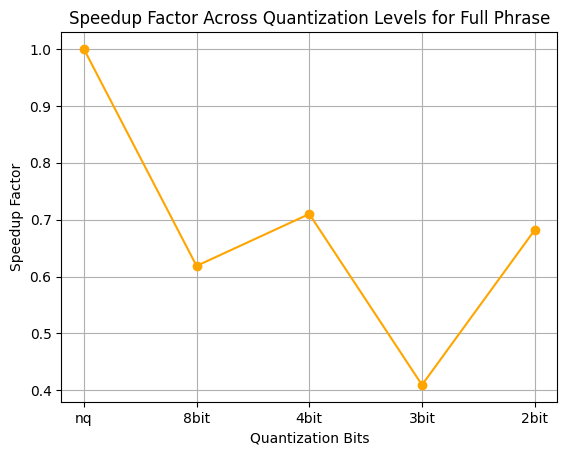

In [43]:
# quantized_times = {
#     32: [36.40, 32.60, 0.8759431108000454],
#     2: [38.88, 50.00, 1.2861911343713561],
#     3: [62.56, 50.00, 0.7996041133531999],
#     4: [44.43, 34.80, 0.7633557898986059],
#     8: [55.81, 50.00, 0.8960140849400926]
# }
importlib.reload(utils_QA)
configurations = ["nq", "8bit", "4bit", "3bit", "2bit"]
utils_QA.print_speedup(quantized_times, configurations)

In [84]:
import torch
import time

def measure_inference_time(model, inputs, tokenizer, num_trials=5):
    
    # Warm-up run
    for _ in range(2):  # Run twice for warm-up
        _ = model.generate(**inputs)
    
    # Measure inference time
    total_time = 0.0
    times = []
    token_counts = []
    
    for _ in range(num_trials):
        torch.cuda.synchronize()  # Ensure all CUDA operations are complete
        start_time = time.perf_counter()
        
        outputs = model.generate(**inputs, max_new_tokens=50, 
                                 eos_token_id=tokenizer.eos_token_id, 
                                 do_sample=False, 
                                 num_beams=1,
                                 temperature=None, # Remove irrelevant parameter
                                 top_p=None )
        
        torch.cuda.synchronize()  # Ensure generation is complete
        end_time = time.perf_counter()
        answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        curr_time = (end_time - start_time)
        total_time += curr_time
        
        times.append(end_time - start_time)
        token_counts.append(outputs.shape[1] - inputs["input_ids"].shape[1])
        
        print(f"GENERATED ANSWER: {answer}\n")
        print(f"NUMBER OF TOKENS GENERATED: {token_counts[-1]}\n")
        print(f"CURRENT TOKEN GENERATION SPEED: {token_counts[-1]/curr_time}")
        print(f"CURRENT TOTAL TIME: {curr_time}\n")
        
    
    avg_time = sum(times) / len(times)
    avg_tokens = sum(token_counts) / len(token_counts)
    avg_speed = avg_tokens / avg_time
    
    # Return average time per inference
    return avg_time, avg_tokens, avg_speed, times, token_counts


squad_evaluation_dataset = load_dataset("squad", split="validation[:10]")
tokenizer = AutoTokenizer.from_pretrained(llama_path)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token 
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="cuda", torch_dtype="auto")
model.config.pad_token_id = tokenizer.pad_token_id
model.eval()

for example in squad_evaluation_dataset:
    context = example["context"]
    question = example["question"]
    ground_truth = example["answers"]["text"][0]
    prompt = f"""
    Context: {context}

    Question: {question}

    Answer:"""
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    avg_time, avg_tokens, avg_speed, times, token_counts = measure_inference_time(model, inputs, tokenizer)
    print(f"AVG TIME FOR INFERENCE: {avg_time}\n")
    print(f"AVG TOKENS GENERATED: {avg_tokens}\n")
    print(f"AVG SPEED OF GENERATION: {avg_speed}")
    

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the AFC at Super Bowl 50?

    Answer: Denver Broncos

    Explanation: The Denver Broncos represented the AFC at Super Bowl 50.

NUMBER OF TOKENS GEN

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the AFC at Super Bowl 50?

    Answer: Denver Broncos

    Explanation: The Denver Broncos represented the AFC at Super Bowl 50.

NUMBER OF TOKENS GEN

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the AFC at Super Bowl 50?

    Answer: Denver Broncos

    Explanation: The Denver Broncos represented the AFC at Super Bowl 50.

NUMBER OF TOKENS GEN

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the AFC at Super Bowl 50?

    Answer: Denver Broncos

    Explanation: The Denver Broncos represented the AFC at Super Bowl 50.

NUMBER OF TOKENS GEN

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the AFC at Super Bowl 50?

    Answer: Denver Broncos

    Explanation: The Denver Broncos represented the AFC at Super Bowl 50.

NUMBER OF TOKENS GEN

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the NFC at Super Bowl 50?

    Answer: Carolina Panthers

    Explanation: The Carolina Panthers represented the NFC at Super Bowl 50.

NUMBER OF TOKE

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the NFC at Super Bowl 50?

    Answer: Carolina Panthers

    Explanation: The Carolina Panthers represented the NFC at Super Bowl 50.

NUMBER OF TOKE

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the NFC at Super Bowl 50?

    Answer: Carolina Panthers

    Explanation: The Carolina Panthers represented the NFC at Super Bowl 50.

NUMBER OF TOKE

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the NFC at Super Bowl 50?

    Answer: Carolina Panthers

    Explanation: The Carolina Panthers represented the NFC at Super Bowl 50.

NUMBER OF TOKE

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team represented the NFC at Super Bowl 50?

    Answer: Carolina Panthers

    Explanation: The Carolina Panthers represented the NFC at Super Bowl 50.

NUMBER OF TOKE

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Where did Super Bowl 50 take place?

    Answer: Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.

NUMBER OF TOKENS GENERATED: 16

CURRENT TOKEN GENERATI

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Where did Super Bowl 50 take place?

    Answer: Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.

NUMBER OF TOKENS GENERATED: 16

CURRENT TOKEN GENERATI

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Where did Super Bowl 50 take place?

    Answer: Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.

NUMBER OF TOKENS GENERATED: 16

CURRENT TOKEN GENERATI

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Where did Super Bowl 50 take place?

    Answer: Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.

NUMBER OF TOKENS GENERATED: 16

CURRENT TOKEN GENERATI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Where did Super Bowl 50 take place?

    Answer: Levi's Stadium in the San Francisco Bay Area at Santa Clara, California.

NUMBER OF TOKENS GENERATED: 16

CURRENT TOKEN GENERATI

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team won Super Bowl 50?

    Answer: The Denver Broncos.

    Explanation: The Denver Broncos won Super Bowl 50 by defeating the Carolina Panthers 24–10.

NUMBER OF TO

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team won Super Bowl 50?

    Answer: The Denver Broncos.

    Explanation: The Denver Broncos won Super Bowl 50 by defeating the Carolina Panthers 24–10.

NUMBER OF TO

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team won Super Bowl 50?

    Answer: The Denver Broncos.

    Explanation: The Denver Broncos won Super Bowl 50 by defeating the Carolina Panthers 24–10.

NUMBER OF TO

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team won Super Bowl 50?

    Answer: The Denver Broncos.

    Explanation: The Denver Broncos won Super Bowl 50 by defeating the Carolina Panthers 24–10.

NUMBER OF TO

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: Which NFL team won Super Bowl 50?

    Answer: The Denver Broncos.

    Explanation: The Denver Broncos won Super Bowl 50 by defeating the Carolina Panthers 24–10.

NUMBER OF TO

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What color was used to emphasize the 50th anniversary of the Super Bowl?

    Answer: Gold. The league emphasized the "golden anniversary" with various gold-themed initiatives, 

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What color was used to emphasize the 50th anniversary of the Super Bowl?

    Answer: Gold. The league emphasized the "golden anniversary" with various gold-themed initiatives, 

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What color was used to emphasize the 50th anniversary of the Super Bowl?

    Answer: Gold. The league emphasized the "golden anniversary" with various gold-themed initiatives, 

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What color was used to emphasize the 50th anniversary of the Super Bowl?

    Answer: Gold. The league emphasized the "golden anniversary" with various gold-themed initiatives, 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What color was used to emphasize the 50th anniversary of the Super Bowl?

    Answer: Gold. The league emphasized the "golden anniversary" with various gold-themed initiatives, 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What day was the game played on?

    Answer: February 7, 2016

    Explanation: The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Sant

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What day was the game played on?

    Answer: February 7, 2016

    Explanation: The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Sant

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What day was the game played on?

    Answer: February 7, 2016

    Explanation: The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Sant

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What day was the game played on?

    Answer: February 7, 2016

    Explanation: The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Sant

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What day was the game played on?

    Answer: February 7, 2016

    Explanation: The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Sant

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What is the AFC short for?

    Answer: American Football Conference

    Explanation: The AFC stands for American Football Conference, which is one of the two conferences in th

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What is the AFC short for?

    Answer: American Football Conference

    Explanation: The AFC stands for American Football Conference, which is one of the two conferences in th

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What is the AFC short for?

    Answer: American Football Conference

    Explanation: The AFC stands for American Football Conference, which is one of the two conferences in th

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What is the AFC short for?

    Answer: American Football Conference

    Explanation: The AFC stands for American Football Conference, which is one of the two conferences in th

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What is the AFC short for?

    Answer: American Football Conference

    Explanation: The AFC stands for American Football Conference, which is one of the two conferences in th

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What was the theme of Super Bowl 50?

    Answer: The theme of Super Bowl 50 was the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What does AFC stand for?

    Answer: American Football Conference.

NUMBER OF TOKENS GENERATED: 5

CURRENT TOKEN GENERATION SPEED: 0.9347151214510033
CURRENT TOTAL TIME: 5.3492

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What does AFC stand for?

    Answer: American Football Conference.

NUMBER OF TOKENS GENERATED: 5

CURRENT TOKEN GENERATION SPEED: 0.9248142649268379
CURRENT TOTAL TIME: 5.4064

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What does AFC stand for?

    Answer: American Football Conference.

NUMBER OF TOKENS GENERATED: 5

CURRENT TOKEN GENERATION SPEED: 0.8810860845068248
CURRENT TOTAL TIME: 5.6748

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


GENERATED ANSWER: 
    Context: Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.

    Question: What does AFC stand for?

    Answer: American Football Conference.

NUMBER OF TOKENS GENERATED: 5

CURRENT TOKEN GENERATION SPEED: 0.8445276315453016
CURRENT TOTAL TIME: 5.9204

### Dynamic quantization test

In [8]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"
quant_path = "Llama-3.2-1B-Instruct-gptqmodel-SQuAD-lowhigh-4bits-128gs"

tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the wikitext dataset

# Choose number of bits for quantization
quant_config = QuantizeConfig(bits=2, 
                              dynamic={"layer_0":{"bits": 4},
                                       "layer_1":{"bits": 4},
                                       "layer_2":{"bits": 4},
                                       "layer_13":{"bits": 4},
                                       "layer_14":{"bits": 4},
                                       "layer_15":{"bits": 4}},
                              group_size=128)

print("LOADING MODEL")
model = GPTQModel.load(model_id, quant_config)
print("MODEL LOADED")

print("QUANTIZING...")
model.quantize(used_dataset)

print("SAVING...")
model.save(quant_path)

LOADING MODEL


WARNING - GPTQModel's per-module `dynamic` quantization feature is currently not upstreamed to hf/vllm/sglang. If you're using vllm, you need to install this PR: https://github.com/vllm-project/vllm/pull/7086
INFO - Auto pick kernel based on compatibility: <class 'gptqmodel.nn_modules.qlinear.dynamic_cuda.DynamicCudaQuantLinear'>
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


MODEL LOADED
QUANTIZING...
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '5.56426', 'damp': '0.01000', 'time': '1.731', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.14395', 'damp': '0.01000', 'time': '1.294', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '11.66864', 'damp': '0.01000', 'time': '1.551', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.01561', 'damp': '0.01000', 'time': '1.256', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '10.48548', 'damp': '0.01000', 'time': '1.567', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '13.23688', 'damp': '0.01000', 'time': '1.430', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.08406', 'damp': '0.01000', 'time': '6.984', 'dynamic': None}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:02:44 / 0:21:52 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '11.40233', 'damp': '0.01000', 'time': '1.346', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.63990', 'damp': '0.01000', 'time': '1.259', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '21.60234', 'damp': '0.01000', 'time': '1.427', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.03533', 'damp': '0.01000', 'time': '1.366', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '17.62402', 'damp': '0.01000', 'time': '1.274', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '24.20526', 'damp': '0.01000', 'time': '1.176', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '154.98728', 'damp': '0.01000', 'time': '5.391', 'dynamic': None}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:05:24 / 0:28:48 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '16.65461', 'damp': '0.01000', 'time': '1.029', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '1.19841', 'damp': '0.01000', 'time': '1.183', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '33.34211', 'damp': '0.01000', 'time': '1.255', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.03663', 'damp': '0.01000', 'time': '1.219', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '19.41586', 'damp': '0.01000', 'time': '1.264', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '31.13503', 'damp': '0.01000', 'time': '1.346', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.21584', 'damp': '0.01000', 'time': '5.025', 'dynamic': None}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:08:01 / 0:32:04 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '13.93081', 'damp': '0.01000', 'time': '1.100', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '1.82396', 'damp': '0.01000', 'time': '1.095', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '30.61980', 'damp': '0.01000', 'time': '1.309', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.06521', 'damp': '0.01000', 'time': '1.283', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '26.11514', 'damp': '0.01000', 'time': '1.217', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '51.98645', 'damp': '0.01000', 'time': '1.296', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.33103', 'damp': '0.01000', 'time': '5.405', 'dynamic': None}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:10:40 / 0:34:08 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '16.60056', 'damp': '0.01000', 'time': '1.001', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '1.95038', 'damp': '0.01000', 'time': '1.107', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '34.68789', 'damp': '0.01000', 'time': '1.197', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.11142', 'damp': '0.01000', 'time': '1.061', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '29.35441', 'damp': '0.01000', 'time': '1.249', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '63.11304', 'damp': '0.01000', 'time': '1.228', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.41264', 'damp': '0.01000', 'time': '5.044', 'dynamic': None}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:13:15 / 0:35:20 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '25.26121', 'damp': '0.01000', 'time': '1.153', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '1.81423', 'damp': '0.01000', 'time': '1.193', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '45.81329', 'damp': '0.01000', 'time': '1.431', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.12993', 'damp': '0.01000', 'time': '1.217', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '32.44000', 'damp': '0.01000', 'time': '1.117', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '59.74218', 'damp': '0.01000', 'time': '1.134', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.48083', 'damp': '0.01000', 'time': '5.323', 'dynamic': None}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:15:52 / 0:36:16 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '23.58574', 'damp': '0.01000', 'time': '1.085', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '2.48279', 'damp': '0.01000', 'time': '1.197', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '36.92741', 'damp': '0.01000', 'time': '1.382', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.20596', 'damp': '0.01000', 'time': '1.158', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '33.41346', 'damp': '0.01000', 'time': '1.335', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '60.15159', 'damp': '0.01000', 'time': '1.213', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.52850', 'damp': '0.01000', 'time': '5.433', 'dynamic': None}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:18:29 / 0:36:58 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '24.65170', 'damp': '0.01000', 'time': '1.141', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '3.00150', 'damp': '0.01000', 'time': '1.266', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '45.88309', 'damp': '0.01000', 'time': '1.487', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.20620', 'damp': '0.01000', 'time': '1.133', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '36.42768', 'damp': '0.01000', 'time': '1.220', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '58.85655', 'damp': '0.01000', 'time': '1.233', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.60926', 'damp': '0.01000', 'time': '4.833', 'dynamic': None}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:21:05 / 0:37:28 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '29.72180', 'damp': '0.01000', 'time': '1.167', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '2.99989', 'damp': '0.01000', 'time': '1.297', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '48.68278', 'damp': '0.01000', 'time': '1.521', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.25020', 'damp': '0.01000', 'time': '1.142', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '41.37107', 'damp': '0.01000', 'time': '1.078', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '64.75611', 'damp': '0.01000', 'time': '1.159', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.78653', 'damp': '0.01000', 'time': '5.197', 'dynamic': None}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:23:43 / 0:37:56 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '24.44798', 'damp': '0.01000', 'time': '1.177', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '3.56201', 'damp': '0.01000', 'time': '1.105', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '59.40517', 'damp': '0.01000', 'time': '1.233', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.43049', 'damp': '0.01000', 'time': '1.239', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '45.98615', 'damp': '0.01000', 'time': '1.184', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '74.61963', 'damp': '0.01000', 'time': '1.270', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.95863', 'damp': '0.01000', 'time': '4.850', 'dynamic': None}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:26:21 / 0:38:19 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '29.21612', 'damp': '0.01000', 'time': '1.140', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '3.60865', 'damp': '0.01000', 'time': '1.137', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '60.90125', 'damp': '0.01000', 'time': '1.299', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.37233', 'damp': '0.01000', 'time': '1.056', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '55.77105', 'damp': '0.01000', 'time': '1.096', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '87.55884', 'damp': '0.01000', 'time': '1.311', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '1.30555', 'damp': '0.01000', 'time': '4.975', 'dynamic': None}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:28:58 / 0:38:37 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '35.37206', 'damp': '0.01000', 'time': '1.056', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '3.79083', 'damp': '0.01000', 'time': '1.042', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '60.34558', 'damp': '0.01000', 'time': '1.350', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.26839', 'damp': '0.01000', 'time': '1.025', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '65.23905', 'damp': '0.01000', 'time': '1.105', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '100.09834', 'damp': '0.01000', 'time': '1.228', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '1.66185', 'damp': '0.01000', 'time': '5.616', 'dynamic': None}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:31:34 / 0:38:51 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '34.21405', 'damp': '0.01000', 'time': '1.133', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '3.95214', 'damp': '0.01000', 'time': '1.273', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '62.12046', 'damp': '0.01000', 'time': '1.541', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.29593', 'damp': '0.01000', 'time': '1.158', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '71.77298', 'damp': '0.01000', 'time': '1.271', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '104.32764', 'damp': '0.01000', 'time': '1.378', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '2.17589', 'damp': '0.01000', 'time': '4.996', 'dynamic': None}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:34:11 / 0:39:04 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '34.58945', 'damp': '0.01000', 'time': '1.097', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '6.37336', 'damp': '0.01000', 'time': '1.151', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '68.96320', 'damp': '0.01000', 'time': '1.325', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.48532', 'damp': '0.01000', 'time': '1.130', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '84.16047', 'damp': '0.01000', 'time': '1.188', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '111.79678', 'damp': '0.01000', 'time': '1.219', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '3.22090', 'damp': '0.01000', 'time': '4.925', 'dynamic': None}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:36:46 / 0:39:13 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '33.10991', 'damp': '0.01000', 'time': '1.083', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '12.61296', 'damp': '0.01000', 'time': '1.149', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '67.77684', 'damp': '0.01000', 'time': '1.213', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '1.24972', 'damp': '0.01000', 'time': '1.055', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '94.26672', 'damp': '0.01000', 'time': '1.250', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '135.25284', 'damp': '0.01000', 'time': '1.300', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '3.99224', 'damp': '0.01000', 'time': '4.967', 'dynamic': None}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:39:24 / 0:39:24 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '30.56205', 'damp': '0.01000', 'time': '1.020', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '13.48467', 'damp': '0.01000', 'time': '1.238', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '62.45148', 'damp': '0.01000', 'time': '1.327', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '3.32128', 'damp': '0.01000', 'time': '1.093', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '117.93300', 'damp': '0.01000', 'time': '1.149', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '156.44528', 'damp': '0.01000', 'time': '1.449', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '9.80284', 'damp': '0.01000', 'time': '5.483', 'dynamic': None}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '5.56426', 'damp': '0.01000', 'time': '1.731', 'dynamic': None

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%7 / 1:27:44 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING...


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1251.74MB, 1.22GB
INFO - Size difference: 3462.58MB, 3.38GB - 73.45%


In [9]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"
quant_path = "Llama-3.2-1B-Instruct-gptqmodel-SQuAD-lowhigh-2bits-128gs"

tokenizer = AutoTokenizer.from_pretrained(model_id)

# Choose number of bits for quantization
quant_config = QuantizeConfig(bits=4, 
                              dynamic={"layer_0":{"bits": 2},
                                       "layer_1":{"bits": 2},
                                       "layer_2":{"bits": 2},
                                       "layer_13":{"bits": 2},
                                       "layer_14":{"bits": 2},
                                       "layer_15":{"bits": 2}},
                              group_size=128)

print("LOADING MODEL")
model = GPTQModel.load(model_id, quant_config)
print("MODEL LOADED")

print("QUANTIZING...")
model.quantize(used_dataset)

print("SAVING...")
model.save(quant_path)

LOADING MODEL


WARNING - GPTQModel's per-module `dynamic` quantization feature is currently not upstreamed to hf/vllm/sglang. If you're using vllm, you need to install this PR: https://github.com/vllm-project/vllm/pull/7086
WARNING - The average length of input_ids of calibration_dataset should be greater than 256: actual avg: 224.044.
WARNING - Model config does not have pad token mapped. Please pass in tokenizer to `quantize()` so GPTQModel can auto-select the best pad token.


MODEL LOADED
QUANTIZING...
  |██--------------------------------------| 0:00:00 / 0:00:00 [1/16] 6.2%

INFO - {'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.14485', 'damp': '0.01000', 'time': '1.114', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.v_proj', 'loss': '0.00446', 'damp': '0.01000', 'time': '1.240', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.q_proj', 'loss': '0.30720', 'damp': '0.01000', 'time': '1.411', 'dynamic': None}
INFO - {'layer': 0, 'module': 'self_attn.o_proj', 'loss': '0.00049', 'damp': '0.01000', 'time': '1.160', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.up_proj', 'loss': '0.32733', 'damp': '0.01000', 'time': '1.196', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.gate_proj', 'loss': '0.40889', 'damp': '0.01000', 'time': '1.250', 'dynamic': None}
INFO - {'layer': 0, 'module': 'mlp.down_proj', 'loss': '0.00189', 'damp': '0.01000', 'time': '4.932', 'dynamic': None}


 Quantizing mlp.down_proj in layer 0 of 15 |█████-----------------------------------| 0:02:36 / 0:20:48 [2/16] 12.5%

INFO - {'layer': 1, 'module': 'self_attn.k_proj', 'loss': '0.29541', 'damp': '0.01000', 'time': '1.200', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.v_proj', 'loss': '0.01786', 'damp': '0.01000', 'time': '1.193', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.q_proj', 'loss': '0.59259', 'damp': '0.01000', 'time': '1.304', 'dynamic': None}
INFO - {'layer': 1, 'module': 'self_attn.o_proj', 'loss': '0.00106', 'damp': '0.01000', 'time': '1.158', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.up_proj', 'loss': '0.51571', 'damp': '0.01000', 'time': '1.226', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.gate_proj', 'loss': '0.70487', 'damp': '0.01000', 'time': '1.260', 'dynamic': None}
INFO - {'layer': 1, 'module': 'mlp.down_proj', 'loss': '3.92007', 'damp': '0.01000', 'time': '5.779', 'dynamic': None}


 Quantizing mlp.down_proj in layer 1 of 15 |███████---------------------------------| 0:05:15 / 0:28:00 [3/16] 18.8%

INFO - {'layer': 2, 'module': 'self_attn.k_proj', 'loss': '0.60806', 'damp': '0.01000', 'time': '1.043', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.v_proj', 'loss': '0.04492', 'damp': '0.01000', 'time': '1.121', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.q_proj', 'loss': '1.18702', 'damp': '0.01000', 'time': '1.265', 'dynamic': None}
INFO - {'layer': 2, 'module': 'self_attn.o_proj', 'loss': '0.00115', 'damp': '0.01000', 'time': '1.067', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.up_proj', 'loss': '0.69052', 'damp': '0.01000', 'time': '1.112', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.gate_proj', 'loss': '1.08845', 'damp': '0.01000', 'time': '1.169', 'dynamic': None}
INFO - {'layer': 2, 'module': 'mlp.down_proj', 'loss': '0.00556', 'damp': '0.01000', 'time': '5.455', 'dynamic': None}


 Quantizing mlp.down_proj in layer 2 of 15 |██████████------------------------------| 0:07:52 / 0:31:28 [4/16] 25.0%

INFO - {'layer': 3, 'module': 'self_attn.k_proj', 'loss': '0.42209', 'damp': '0.01000', 'time': '1.057', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.v_proj', 'loss': '0.05926', 'damp': '0.01000', 'time': '1.140', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.q_proj', 'loss': '0.93165', 'damp': '0.01000', 'time': '1.142', 'dynamic': None}
INFO - {'layer': 3, 'module': 'self_attn.o_proj', 'loss': '0.00249', 'damp': '0.01000', 'time': '1.095', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.up_proj', 'loss': '0.82591', 'damp': '0.01000', 'time': '1.183', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.gate_proj', 'loss': '1.62938', 'damp': '0.01000', 'time': '1.236', 'dynamic': None}
INFO - {'layer': 3, 'module': 'mlp.down_proj', 'loss': '0.00870', 'damp': '0.01000', 'time': '5.182', 'dynamic': None}


 Quantizing mlp.down_proj in layer 3 of 15 |████████████----------------------------| 0:10:29 / 0:33:32 [5/16] 31.2%

INFO - {'layer': 4, 'module': 'self_attn.k_proj', 'loss': '0.43019', 'damp': '0.01000', 'time': '1.050', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.v_proj', 'loss': '0.05364', 'damp': '0.01000', 'time': '1.140', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.q_proj', 'loss': '0.89892', 'damp': '0.01000', 'time': '1.162', 'dynamic': None}
INFO - {'layer': 4, 'module': 'self_attn.o_proj', 'loss': '0.00447', 'damp': '0.01000', 'time': '1.052', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.up_proj', 'loss': '0.81918', 'damp': '0.01000', 'time': '1.144', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.gate_proj', 'loss': '1.74790', 'damp': '0.01000', 'time': '1.142', 'dynamic': None}
INFO - {'layer': 4, 'module': 'mlp.down_proj', 'loss': '0.01037', 'damp': '0.01000', 'time': '5.116', 'dynamic': None}


 Quantizing mlp.down_proj in layer 4 of 15 |███████████████-------------------------| 0:13:03 / 0:34:48 [6/16] 37.5%

INFO - {'layer': 5, 'module': 'self_attn.k_proj', 'loss': '0.63729', 'damp': '0.01000', 'time': '1.233', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.v_proj', 'loss': '0.04552', 'damp': '0.01000', 'time': '1.168', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.q_proj', 'loss': '1.12357', 'damp': '0.01000', 'time': '1.283', 'dynamic': None}
INFO - {'layer': 5, 'module': 'self_attn.o_proj', 'loss': '0.00474', 'damp': '0.01000', 'time': '1.108', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.up_proj', 'loss': '0.85132', 'damp': '0.01000', 'time': '1.249', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.gate_proj', 'loss': '1.55171', 'damp': '0.01000', 'time': '1.162', 'dynamic': None}
INFO - {'layer': 5, 'module': 'mlp.down_proj', 'loss': '0.01213', 'damp': '0.01000', 'time': '5.949', 'dynamic': None}


 Quantizing mlp.down_proj in layer 5 of 15 |█████████████████-----------------------| 0:15:42 / 0:35:53 [7/16] 43.8%

INFO - {'layer': 6, 'module': 'self_attn.k_proj', 'loss': '0.51553', 'damp': '0.01000', 'time': '1.044', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.v_proj', 'loss': '0.05870', 'damp': '0.01000', 'time': '1.207', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.q_proj', 'loss': '0.83380', 'damp': '0.01000', 'time': '1.358', 'dynamic': None}
INFO - {'layer': 6, 'module': 'self_attn.o_proj', 'loss': '0.00716', 'damp': '0.01000', 'time': '1.208', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.up_proj', 'loss': '0.85103', 'damp': '0.01000', 'time': '1.208', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.gate_proj', 'loss': '1.51679', 'damp': '0.01000', 'time': '1.346', 'dynamic': None}
INFO - {'layer': 6, 'module': 'mlp.down_proj', 'loss': '0.01262', 'damp': '0.01000', 'time': '5.434', 'dynamic': None}


 Quantizing mlp.down_proj in layer 6 of 15 |████████████████████--------------------| 0:18:21 / 0:36:42 [8/16] 50.0%

INFO - {'layer': 7, 'module': 'self_attn.k_proj', 'loss': '0.50693', 'damp': '0.01000', 'time': '1.092', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.v_proj', 'loss': '0.06601', 'damp': '0.01000', 'time': '1.236', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.q_proj', 'loss': '0.97188', 'damp': '0.01000', 'time': '1.273', 'dynamic': None}
INFO - {'layer': 7, 'module': 'self_attn.o_proj', 'loss': '0.00689', 'damp': '0.01000', 'time': '1.149', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.up_proj', 'loss': '0.86535', 'damp': '0.01000', 'time': '1.175', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.gate_proj', 'loss': '1.39177', 'damp': '0.01000', 'time': '1.267', 'dynamic': None}
INFO - {'layer': 7, 'module': 'mlp.down_proj', 'loss': '0.01390', 'damp': '0.01000', 'time': '5.607', 'dynamic': None}


 Quantizing mlp.down_proj in layer 7 of 15 |██████████████████████------------------| 0:20:56 / 0:37:12 [9/16] 56.2%

INFO - {'layer': 8, 'module': 'self_attn.k_proj', 'loss': '0.59795', 'damp': '0.01000', 'time': '1.025', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.v_proj', 'loss': '0.06280', 'damp': '0.01000', 'time': '1.142', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.q_proj', 'loss': '1.00068', 'damp': '0.01000', 'time': '1.204', 'dynamic': None}
INFO - {'layer': 8, 'module': 'self_attn.o_proj', 'loss': '0.00875', 'damp': '0.01000', 'time': '1.208', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.up_proj', 'loss': '0.94350', 'damp': '0.01000', 'time': '1.236', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.gate_proj', 'loss': '1.47327', 'damp': '0.01000', 'time': '1.366', 'dynamic': None}
INFO - {'layer': 8, 'module': 'mlp.down_proj', 'loss': '0.01813', 'damp': '0.01000', 'time': '5.616', 'dynamic': None}


 Quantizing mlp.down_proj in layer 8 of 15 |█████████████████████████---------------| 0:23:32 / 0:37:39 [10/16] 62.5%

INFO - {'layer': 9, 'module': 'self_attn.k_proj', 'loss': '0.47748', 'damp': '0.01000', 'time': '1.108', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.v_proj', 'loss': '0.07387', 'damp': '0.01000', 'time': '1.269', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.q_proj', 'loss': '1.17901', 'damp': '0.01000', 'time': '1.424', 'dynamic': None}
INFO - {'layer': 9, 'module': 'self_attn.o_proj', 'loss': '0.01174', 'damp': '0.01000', 'time': '1.078', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.up_proj', 'loss': '0.97912', 'damp': '0.01000', 'time': '1.183', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.gate_proj', 'loss': '1.57666', 'damp': '0.01000', 'time': '1.262', 'dynamic': None}
INFO - {'layer': 9, 'module': 'mlp.down_proj', 'loss': '0.02105', 'damp': '0.01000', 'time': '5.154', 'dynamic': None}


 Quantizing mlp.down_proj in layer 9 of 15 |███████████████████████████-------------| 0:26:08 / 0:38:00 [11/16] 68.8%

INFO - {'layer': 10, 'module': 'self_attn.k_proj', 'loss': '0.54732', 'damp': '0.01000', 'time': '1.116', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.v_proj', 'loss': '0.07788', 'damp': '0.01000', 'time': '1.149', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.q_proj', 'loss': '1.17159', 'damp': '0.01000', 'time': '1.549', 'dynamic': None}
INFO - {'layer': 10, 'module': 'self_attn.o_proj', 'loss': '0.00765', 'damp': '0.01000', 'time': '1.218', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.up_proj', 'loss': '1.14234', 'damp': '0.01000', 'time': '1.253', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.gate_proj', 'loss': '1.77713', 'damp': '0.01000', 'time': '1.410', 'dynamic': None}
INFO - {'layer': 10, 'module': 'mlp.down_proj', 'loss': '0.02611', 'damp': '0.01000', 'time': '5.557', 'dynamic': None}


 Quantizing mlp.down_proj in layer 10 of 15 |██████████████████████████████----------| 0:28:45 / 0:38:20 [12/16] 75.0%

INFO - {'layer': 11, 'module': 'self_attn.k_proj', 'loss': '0.65959', 'damp': '0.01000', 'time': '1.000', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.v_proj', 'loss': '0.08198', 'damp': '0.01000', 'time': '1.244', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.q_proj', 'loss': '1.17407', 'damp': '0.01000', 'time': '1.288', 'dynamic': None}
INFO - {'layer': 11, 'module': 'self_attn.o_proj', 'loss': '0.00665', 'damp': '0.01000', 'time': '1.065', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.up_proj', 'loss': '1.31149', 'damp': '0.01000', 'time': '1.121', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.gate_proj', 'loss': '2.00358', 'damp': '0.01000', 'time': '1.200', 'dynamic': None}
INFO - {'layer': 11, 'module': 'mlp.down_proj', 'loss': '0.02946', 'damp': '0.01000', 'time': '5.279', 'dynamic': None}


 Quantizing mlp.down_proj in layer 11 of 15 |████████████████████████████████--------| 0:31:22 / 0:38:36 [13/16] 81.2%

INFO - {'layer': 12, 'module': 'self_attn.k_proj', 'loss': '0.66540', 'damp': '0.01000', 'time': '1.175', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.v_proj', 'loss': '0.08446', 'damp': '0.01000', 'time': '1.165', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.q_proj', 'loss': '1.17945', 'damp': '0.01000', 'time': '1.358', 'dynamic': None}
INFO - {'layer': 12, 'module': 'self_attn.o_proj', 'loss': '0.00593', 'damp': '0.01000', 'time': '1.139', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.up_proj', 'loss': '1.41761', 'damp': '0.01000', 'time': '1.196', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.gate_proj', 'loss': '2.05939', 'damp': '0.01000', 'time': '1.241', 'dynamic': None}
INFO - {'layer': 12, 'module': 'mlp.down_proj', 'loss': '0.03522', 'damp': '0.01000', 'time': '5.525', 'dynamic': None}


 Quantizing mlp.down_proj in layer 12 of 15 |███████████████████████████████████-----| 0:34:00 / 0:38:51 [14/16] 87.5%

INFO - {'layer': 13, 'module': 'self_attn.k_proj', 'loss': '0.67996', 'damp': '0.01000', 'time': '1.155', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.v_proj', 'loss': '0.14611', 'damp': '0.01000', 'time': '1.147', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.q_proj', 'loss': '1.38109', 'damp': '0.01000', 'time': '1.294', 'dynamic': None}
INFO - {'layer': 13, 'module': 'self_attn.o_proj', 'loss': '0.00689', 'damp': '0.01000', 'time': '1.134', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.up_proj', 'loss': '1.70011', 'damp': '0.01000', 'time': '1.265', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.gate_proj', 'loss': '2.25610', 'damp': '0.01000', 'time': '1.318', 'dynamic': None}
INFO - {'layer': 13, 'module': 'mlp.down_proj', 'loss': '0.05104', 'damp': '0.01000', 'time': '4.962', 'dynamic': None}


 Quantizing mlp.down_proj in layer 13 of 15 |█████████████████████████████████████---| 0:36:34 / 0:39:00 [15/16] 93.8%

INFO - {'layer': 14, 'module': 'self_attn.k_proj', 'loss': '0.75266', 'damp': '0.01000', 'time': '1.095', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.v_proj', 'loss': '0.31072', 'damp': '0.01000', 'time': '1.188', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.q_proj', 'loss': '1.44708', 'damp': '0.01000', 'time': '1.486', 'dynamic': None}
INFO - {'layer': 14, 'module': 'self_attn.o_proj', 'loss': '0.01597', 'damp': '0.01000', 'time': '1.094', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.up_proj', 'loss': '1.96066', 'damp': '0.01000', 'time': '1.176', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.gate_proj', 'loss': '2.81593', 'damp': '0.01000', 'time': '1.206', 'dynamic': None}
INFO - {'layer': 14, 'module': 'mlp.down_proj', 'loss': '0.06885', 'damp': '0.01000', 'time': '4.867', 'dynamic': None}


 Quantizing mlp.down_proj in layer 14 of 15 |████████████████████████████████████████| 0:39:11 / 0:39:11 [16/16] 100.0%

INFO - {'layer': 15, 'module': 'self_attn.k_proj', 'loss': '0.73069', 'damp': '0.01000', 'time': '1.062', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.v_proj', 'loss': '0.31368', 'damp': '0.01000', 'time': '1.135', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.q_proj', 'loss': '1.33757', 'damp': '0.01000', 'time': '1.174', 'dynamic': None}
INFO - {'layer': 15, 'module': 'self_attn.o_proj', 'loss': '0.09811', 'damp': '0.01000', 'time': '1.200', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.up_proj', 'loss': '2.45545', 'damp': '0.01000', 'time': '1.285', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.gate_proj', 'loss': '3.25411', 'damp': '0.01000', 'time': '1.379', 'dynamic': None}
INFO - {'layer': 15, 'module': 'mlp.down_proj', 'loss': '0.20160', 'damp': '0.01000', 'time': '4.882', 'dynamic': None}
INFO - Quantization summary:
[{'layer': 0, 'module': 'self_attn.k_proj', 'loss': '0.14485', 'damp': '0.01000', 'time': '1.114', 'dynamic': None}, {'la

 Packing model.layers.15.mlp.down_proj |----------------------------------------| 100.0%0 / 1:33:20 [0/112] 0.0%.0%

INFO - Model packed.


 Quantizing mlp.down_proj in layer 15 of 15 |----------------------------------------| 100.0%SAVING...


INFO - Pre-Quantized model size: 4714.32MB, 4.60GB
INFO - Quantized model size: 1485.55MB, 1.45GB
INFO - Size difference: 3228.77MB, 3.15GB - 68.49%
